In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [64]:
sb_data = pd.read_csv('superbowl.csv')
sb_data.head(200)

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California
5,Feb 1 2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
6,Feb 2 2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey
7,Feb 3 2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana
8,Feb 5 2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana
9,Feb 6 2011,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,Aaron Rodgers,Cowboys Stadium,Arlington,Texas


In [66]:
sb_data.info()
sb_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        54 non-null     object
 1   SB          54 non-null     object
 2   Winner      54 non-null     object
 3   Winner Pts  54 non-null     int64 
 4   Loser       54 non-null     object
 5   Loser Pts   54 non-null     int64 
 6   MVP         54 non-null     object
 7   Stadium     54 non-null     object
 8   City        54 non-null     object
 9   State       54 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


,Winner Pts,Loser Pts
count,54.000000,54.000000
mean,30.111111,16.203704
std,9.766455,7.413348
min,13.000000,3.000000
25%,23.250000,10.000000
50%,30.500000,17.000000
75%,35.000000,21.000000
max,55.000000,33.000000


In [68]:
sb_data.columns = sb_data.columns.str.strip()

missing_values = sb_data.isnull().sum()
duplicate_rows = sb_data.duplicated().sum()


sb_data['Winner Pts'].fillna(0, inplace=True)
sb_data['Loser Pts'].fillna(0, inplace=True)

sb_data['Date'] = pd.to_datetime(sb_data['Date'], errors='coerce')

print(f'Number of duplicate rows: {duplicate_rows}')
print(missing_values)

Number of duplicate rows: 0
Date          0
SB            0
Winner        0
Winner Pts    0
Loser         0
Loser Pts     0
MVP           0
Stadium       0
City          0
State         0
dtype: int64


C:\Users\rodri\AppData\Local\Temp\ipykernel_22356\258527331.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_data['Winner Pts'].fillna(0, inplace=True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_22356\258527331.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [70]:
sb_data['MVP'] = sb_data['MVP'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

print(sb_data)

         Date            SB                Winner  Winner Pts  \
0  2020-02-02      LIV (54)    Kansas City Chiefs          31   
1  2019-02-03     LIII (53)  New England Patriots          13   
2  2018-02-04      LII (52)   Philadelphia Eagles          41   
3  2017-02-05       LI (51)  New England Patriots          34   
4  2016-02-07            50        Denver Broncos          24   
5  2015-02-01     XLIX (49)  New England Patriots          28   
6  2014-02-02   XLVIII (48)      Seattle Seahawks          43   
7  2013-02-03    XLVII (47)      Baltimore Ravens          34   
8  2012-02-05     XLVI (46)       New York Giants          21   
9  2011-02-06      XLV (45)     Green Bay Packers          31   
10 2010-02-07     XLIV (44)    New Orleans Saints          31   
11 2009-02-01    XLIII (43)   Pittsburgh Steelers          27   
12 2008-02-03     XLII (42)       New York Giants          17   
13 2007-02-04      XLI (41)    Indianapolis Colts          29   
14 2006-02-05       XL (4

In [72]:
def extract_and_remove_parentheses(sb):
    number = ''.join([char for char in sb if char.isdigit()])
    cleaned_sb = sb.replace('(', '').replace(')', '')
    return number, cleaned_sb

sb_data[['SB Number', 'SB Cleaned']] = sb_data['SB'].apply(lambda x: pd.Series(extract_and_remove_parentheses(x)))

print(sb_data[['SB', 'SB Number', 'SB Cleaned']])


              SB SB Number  SB Cleaned
0       LIV (54)        54      LIV 54
1      LIII (53)        53     LIII 53
2       LII (52)        52      LII 52
3        LI (51)        51       LI 51
4             50        50          50
5      XLIX (49)        49     XLIX 49
6    XLVIII (48)        48   XLVIII 48
7     XLVII (47)        47    XLVII 47
8      XLVI (46)        46     XLVI 46
9       XLV (45)        45      XLV 45
10     XLIV (44)        44     XLIV 44
11    XLIII (43)        43    XLIII 43
12     XLII (42)        42     XLII 42
13      XLI (41)        41      XLI 41
14       XL (40)        40       XL 40
15    XXXIX (39)        39    XXXIX 39
16  XXXVIII (38)        38  XXXVIII 38
17   XXXVII (37)        37   XXXVII 37
18    XXXVI (36)        36    XXXVI 36
19     XXXV (35)        35     XXXV 35
20    XXXIV (34)        34    XXXIV 34
21   XXXIII (33)        33   XXXIII 33
22    XXXII (32)        32    XXXII 32
23     XXXI (31)        31     XXXI 31
24      XXX (30)        3

In [74]:
sb_data['Winning Margin'] = sb_data['Winner Pts'] - sb_data['Loser Pts']
sb_data['Losing Margin'] = sb_data['Loser Pts'] - sb_data['Winner Pts']  # Losing margin calculation

# Most Super Bowl Wins
team_wins = sb_data['Winner'].value_counts()
most_wins_team = team_wins.idxmax()
most_wins_count = team_wins.max()
avg_win_margin = sb_data[sb_data['Winner'] == most_wins_team]['Winning Margin'].mean()


# Most Super Bowl Losses
team_losses = sb_data['Loser'].value_counts()
most_losses_team = team_losses.idxmax()
most_losses_count = team_losses.max()
avg_loss_margin = sb_data[sb_data['Loser'] == most_losses_team]['Losing Margin'].mean()


# Average Winning Margin for Most Wins Team
avg_margin = sb_data[sb_data['Winner'] == most_wins_team]['Winning Margin'].mean()

print(f"Team with most Super Bowl wins: {most_wins_team} ({most_wins_count} wins)")
print(f"Team with the most Super Bowl wins: {most_wins_team} with {most_wins_count} wins, average winning margin: {avg_win_margin:.2f}")

print(f"Average winning margin for {most_wins_team}: {avg_margin:.2f} points")
print(f"Team with the most Super Bowl losses: {most_losses_team} with {most_losses_count} losses, average losing margin: {avg_loss_margin:.2f}")

Team with most Super Bowl wins: Pittsburgh Steelers (6 wins)
Team with the most Super Bowl wins: Pittsburgh Steelers with 6 wins, average winning margin: 7.50
Average winning margin for Pittsburgh Steelers: 7.50 points
Team with the most Super Bowl losses: New England Patriots with 5 losses, average losing margin: -13.00


In [11]:
sb_q1 = sb_data.drop(columns=['Date', 'MVP', 'Stadium', 'City', 'State'])
sb_q1.head(100)

,SB,Winner,Winner Pts,Loser,Loser Pts,SB Number,SB Cleaned,Winning Margin,Losing Margin
0,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,54,LIV 54,11,-11
1,LIII (53),New England Patriots,13,Los Angeles Rams,3,53,LIII 53,10,-10
2,LII (52),Philadelphia Eagles,41,New England Patriots,33,52,LII 52,8,-8
3,LI (51),New England Patriots,34,Atlanta Falcons,28,51,LI 51,6,-6
4,50,Denver Broncos,24,Carolina Panthers,10,50,50,14,-14
5,XLIX (49),New England Patriots,28,Seattle Seahawks,24,49,XLIX 49,4,-4
6,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,48,XLVIII 48,35,-35
7,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,47,XLVII 47,3,-3
8,XLVI (46),New York Giants,21,New England Patriots,17,46,XLVI 46,4,-4
9,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,45,XLV 45,6,-6


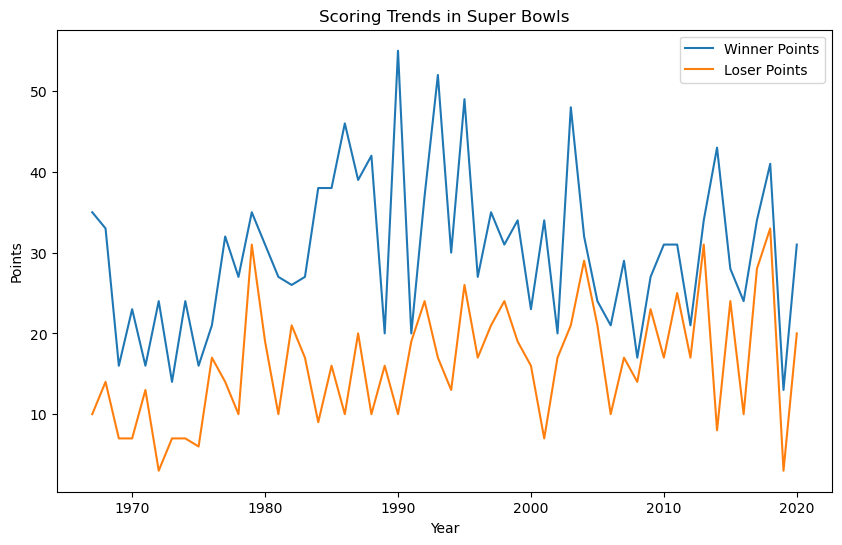

In [12]:
sb_data['Year'] = sb_data['Date'].dt.year

plt.figure(figsize=(10, 6))
plt.plot(sb_data['Year'], sb_data['Winner Pts'], label='Winner Points')
plt.plot(sb_data['Year'], sb_data['Loser Pts'], label='Loser Points')
plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Scoring Trends in Super Bowls')
plt.legend()
plt.show()

In [13]:
sb_q1 = sb_data.drop(columns=['Date', 'MVP', 'Stadium', 'City', 'State'])
sb_q1.head(100)

,SB,Winner,Winner Pts,Loser,Loser Pts,SB Number,SB Cleaned,Winning Margin,Losing Margin,Year
0,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,54,LIV 54,11,-11,2020
1,LIII (53),New England Patriots,13,Los Angeles Rams,3,53,LIII 53,10,-10,2019
2,LII (52),Philadelphia Eagles,41,New England Patriots,33,52,LII 52,8,-8,2018
3,LI (51),New England Patriots,34,Atlanta Falcons,28,51,LI 51,6,-6,2017
4,50,Denver Broncos,24,Carolina Panthers,10,50,50,14,-14,2016
5,XLIX (49),New England Patriots,28,Seattle Seahawks,24,49,XLIX 49,4,-4,2015
6,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,48,XLVIII 48,35,-35,2014
7,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,47,XLVII 47,3,-3,2013
8,XLVI (46),New York Giants,21,New England Patriots,17,46,XLVI 46,4,-4,2012
9,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,45,XLV 45,6,-6,2011


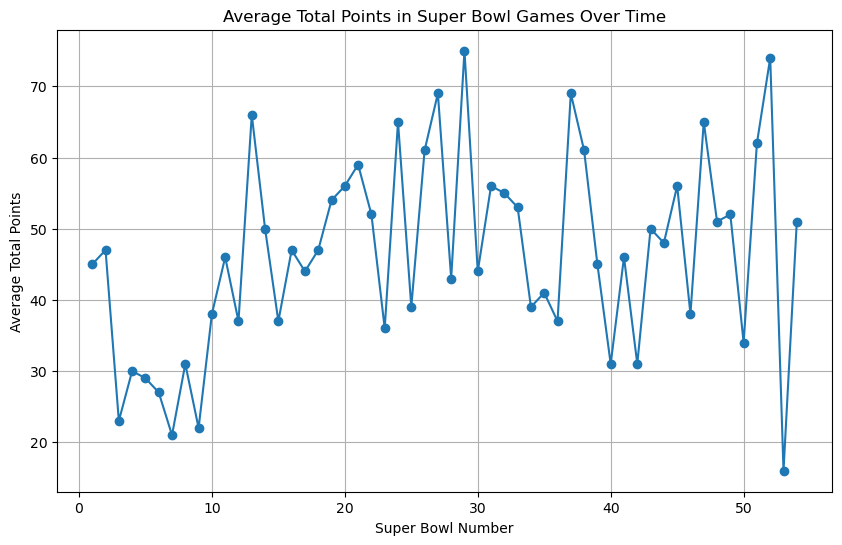

In [14]:

sb_data['Year'] = sb_data['SB'].str.extract(r'(\d{1,2})').astype(int)
sb_data['Total Points'] = sb_data['Winner Pts'] + sb_data['Loser Pts']

yearly_trends = sb_data.groupby('Year')['Total Points'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o')
plt.title('Average Total Points in Super Bowl Games Over Time')
plt.xlabel('Super Bowl Number')
plt.ylabel('Average Total Points')
plt.grid()
plt.show()

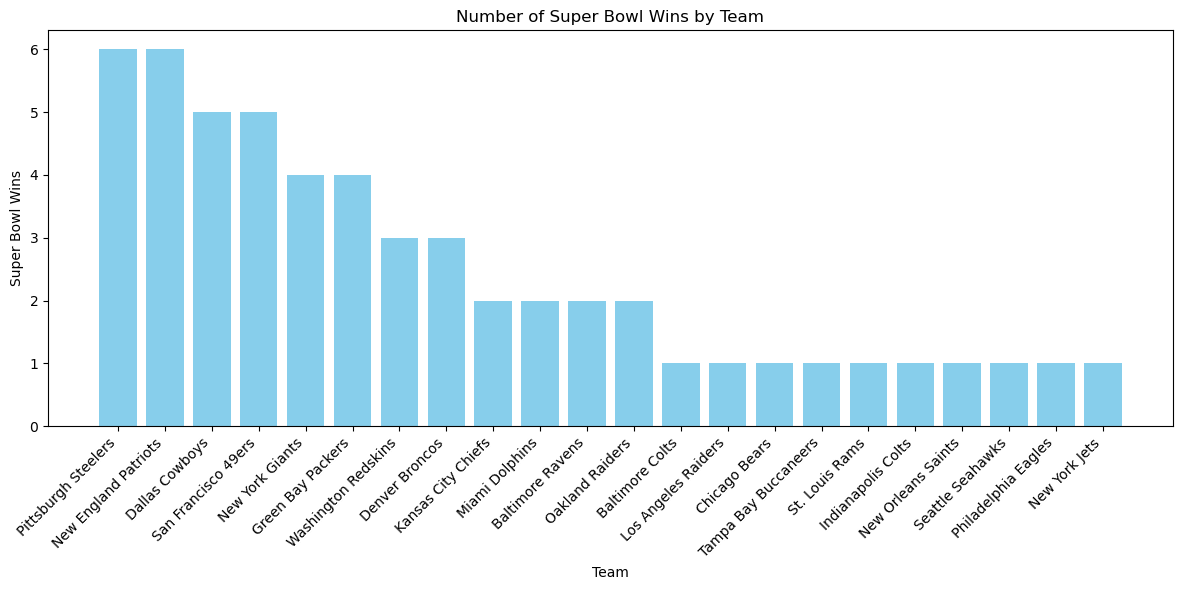

In [15]:
team_wins = sb_data['Winner'].value_counts()

sb_wincnt = pd.DataFrame({
    'Team': team_wins.index,
    'Super Bowl Wins': team_wins.values
})

avg_margins = sb_data.groupby('Winner')['Winning Margin'].mean().reset_index()
avg_margins.columns = ['Team', 'Average Winning Margin']

sb_wincnt = sb_wincnt.merge(avg_margins, on='Team', how='left')

sb_wincnt.head(100)

plt.figure(figsize=(12, 6))
plt.bar(sb_wincnt['Team'], sb_wincnt['Super Bowl Wins'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Super Bowl Wins')
plt.title('Number of Super Bowl Wins by Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()



Game Type
Blowout       35
Close Game    19
Name: count, dtype: int64


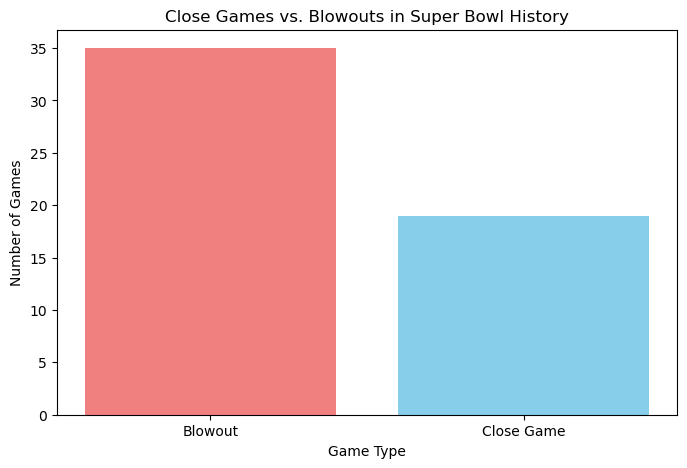

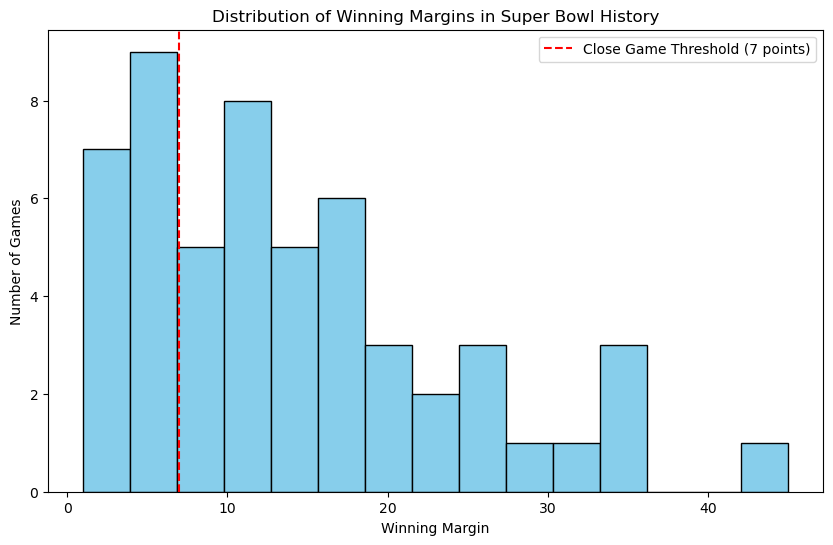

In [16]:
#Q2
sb_data['Game Type'] = sb_data['Winning Margin'].apply(lambda x: 'Close Game' if x <= 7 else 'Blowout')

game_type_counts = sb_data['Game Type'].value_counts()
print(game_type_counts)

# close games vs. blowouts
plt.figure(figsize=(8, 5))
plt.bar(game_type_counts.index, game_type_counts.values, color=['lightcoral', 'skyblue'])
plt.xlabel('Game Type')
plt.ylabel('Number of Games')
plt.title('Close Games vs. Blowouts in Super Bowl History')
plt.show()
 
# Winning margins
plt.figure(figsize=(10, 6))
plt.hist(sb_data['Winning Margin'], bins=15, color='skyblue', edgecolor='black')
plt.axvline(x=7, color='red', linestyle='--', label='Close Game Threshold (7 points)')
plt.xlabel('Winning Margin')
plt.ylabel('Number of Games')
plt.title('Distribution of Winning Margins in Super Bowl History')
plt.legend()
plt.show()

Percentage of Super Bowls decided by 10 points or less: 46.30%
Percentage of Super Bowls decided by more than 10 points: 53.70%


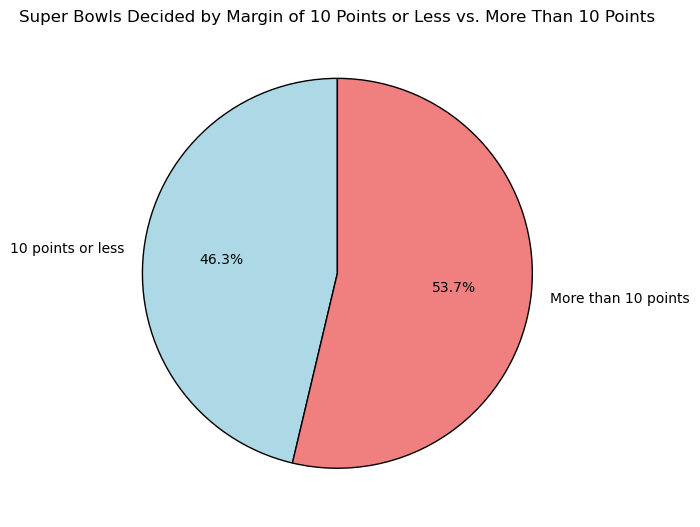

In [17]:

sb_data['Margin Category'] = sb_data['Winning Margin'].apply(lambda x: '10 points or less' if x <= 10 else 'More than 10 points')

margin_counts = sb_data['Margin Category'].value_counts()

total_games = len(sb_data)

percent_10_or_less = (margin_counts['10 points or less'] / total_games) * 100
percent_more_than_10 = (margin_counts['More than 10 points'] / total_games) * 100

print(f"Percentage of Super Bowls decided by 10 points or less: {percent_10_or_less:.2f}%")
print(f"Percentage of Super Bowls decided by more than 10 points: {percent_more_than_10:.2f}%")


margin_counts = sb_data['Margin Category'].value_counts()
total_games = len(sb_data)

percent_10_or_less = (margin_counts['10 points or less'] / total_games) * 100
percent_more_than_10 = (margin_counts['More than 10 points'] / total_games) * 100

labels = ['10 points or less', 'More than 10 points']
sizes = [percent_10_or_less, percent_more_than_10]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Super Bowls Decided by Margin of 10 Points or Less vs. More Than 10 Points')

plt.tight_layout()
plt.show()

In [18]:
sb_wincnt.to_csv('sb_wincnt.csv', index=False)
sb_q1.to_csv('sb_q1.csv', index=False)
sb_data.to_csv('sb_data.csv', index=False)


In [14]:
data = pd.read_csv('sb_wincnt.csv')

In [16]:
data.head()

,Team,Super Bowl Wins,Average Winning Margin
0,Pittsburgh Steelers,6,7.500000
1,New England Patriots,6,4.833333
2,Dallas Cowboys,5,20.000000
3,San Francisco 49ers,5,19.800000
4,New York Giants,4,6.750000
